### IS727272 - Cordero Hernández, Marco Ricardo

# **Principal Component Analysis (PCA)**

PCA es un procedimiento estadístico para convertir un conjunto de observaciones de variables posiblemente correlacionadas en un un conjunto de valores de variables linealmente no correlacionadas.

Cada componente principal es calculado de tal forma que describiría la mayoría de la varianza disponible y todos estos componentes principales son ortogonales entre ellos.

## **Usos de PCA**
*   Se utiliza para encontrar una inter-relación entre las variables de un conjunto de datos.
*   Se utiliza pra interpretar y visualizar información
*   Como el número de variables decrece el análisis es mucho más simple

## **Objetivos de PCA**
*   Es un procedimiento independiente en el cual se reduce el número de atributos.
*   La tarea princpal en PCA es seleccionar un subconjunto de variables de un conjunto muy grande, basado en cuales variables originales tienen la correlación más alta con la cantidad principal.

# **Ejemplo**

***Paso 1: Importar librerías***






In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

***Paso 2: Leer el dataset***

El dataset que utilizaremos es 'wines.csv'

In [2]:
# Importing or loading the dataset 
dataset = pd.read_csv(".\Datasets\wine.data", header = None)
  
# Distributing the dataset into two components X and Y 
X = dataset.iloc[:, 1:14].values
y = dataset.iloc[:, 0].values

***Paso 3: Split el dataset***



In [3]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

***Paso 4: Escalamiento de features***

In [4]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

***Paso 5: Aplicar la función PCA***

In [5]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.34742496 0.19120613]


***Paso 6: Regresión Logística para el set de entrenamiento***

In [6]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

***Paso 7: Predecir el resultado***

In [7]:
y_pred = classifier.predict(X_test)
y_pred

array([3, 1, 2, 3, 2, 3, 3, 1, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 3, 2, 2,
       3, 2, 2, 2, 2, 2, 1, 1, 3, 3, 2, 3, 3, 3], dtype=int64)

***Paso 8: Hacer la matriz de confusión***

In [8]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  1 13]
 [ 2 13  1]
 [ 6  0  0]]


In [9]:
def accuracy(y_hat, y):
    m = len(y)
    tptn = (y == y_hat).sum()
    acc = tptn / m
    return acc

classifier.score(X_train, y_train)

0.9647887323943662

***Paso 9: Predecir los datos de entrenamiento***

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


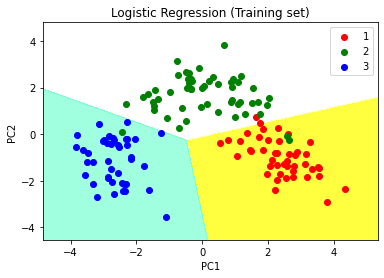

In [10]:
# Predicting the training set result through scatter plot  
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 
  
# Show scatter plot 
plt.show() 

***Paso 10: Visualizar los datos de prueba***

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


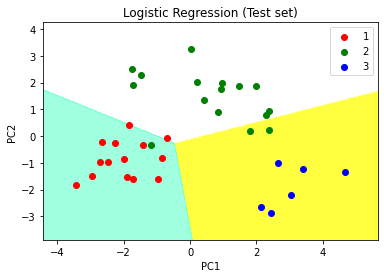

In [11]:
# Visualising the Test set results through scatter plot 
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_test, y_test 
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))  
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
# title for scatter plot 
plt.title('Logistic Regression (Test set)')  
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() 
  
# Show scatter plot 
plt.show() 